### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [ ]:
ingr_total_tienda1 = tienda['Precio'].sum()
ingr_total_tienda2 = tienda2['Precio'].sum()
ingr_total_tienda3 = tienda3['Precio'].sum()
ingr_total_tienda4 = tienda4['Precio'].sum()

print(f'El ingreso total de la tienda 1 fue de: {ingr_total_tienda1}.')
print(f'El ingreso total de la tienda 2 fue de: {ingr_total_tienda2}.')
print(f'El ingreso total de la tienda 3 fue de: {ingr_total_tienda3}.')
print(f'El ingreso total de la tienda 4 fue de: {ingr_total_tienda4}.')

El ingreso total de la tienda 1 fue de: 1150880400.0.
El ingreso total de la tienda 2 fue de: 1116343500.0.
El ingreso total de la tienda 3 fue de: 1098019600.0.
El ingreso total de la tienda 4 fue de: 1038375700.0.


In [ ]:
#importo la biblioteca para los gráficos
from matplotlib import pyplot as plt

In [ ]:
Tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Ingresos = [ingr_total_tienda1, ingr_total_tienda2, ingr_total_tienda3, ingr_total_tienda4]

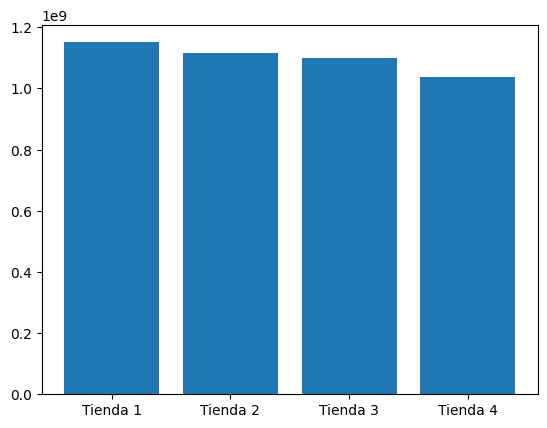

In [ ]:
plt.bar(Tiendas, Ingresos)
plt.show()

# 2. Ventas por categoría

In [ ]:
# Iterar sobre cada URL y generar una tabla para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  df = pd.read_csv(url)
  suma_por_producto = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)

  print(f'Ventas agrupadas por Categoría de la Tienda {nombre}:')
  print(suma_por_producto)
  print('\n')


Ventas agrupadas por Categoría de la Tienda tienda_1:
    Categoría del Producto       Precio
3             Electrónicos  409476100.0
2        Electrodomésticos  283260200.0
7                  Muebles  192528900.0
4   Instrumentos musicales   75102400.0
1     Deportes y diversión   33350100.0
5                 Juguetes   20262200.0
0  Artículos para el hogar   15074500.0
6                   Libros    9321300.0


Ventas agrupadas por Categoría de la Tienda tienda_2:
    Categoría del Producto       Precio
3             Electrónicos  410831100.0
2        Electrodomésticos  348567800.0
7                  Muebles  176426300.0
4   Instrumentos musicales  104990300.0
1     Deportes y diversión   34744500.0
5                 Juguetes   15945400.0
0  Artículos para el hogar   14746900.0
6                   Libros   10091200.0


Ventas agrupadas por Categoría de la Tienda tienda_3:
    Categoría del Producto       Precio
3             Electrónicos  410775800.0
2        Electrodomésticos  329237

# 3. Calificación promedio de la tienda


In [7]:
import matplotlib.pyplot as plt

urls_tienda = {'tienda 1': url, 'tienda 2': url2, 'tienda 3': url3, 'tienda 4': url4}

#Almacenamos el resultado en listas

calificaciones_promedio = []

#calculamos promedio
for nombre_tienda, url_tienda in urls_tienda.items():
    df = pd.read_csv(url_tienda)
    promedio = df['Calificación'].mean()
    calificaciones_promedio.append({'Tienda': nombre_tienda, 'Calificación Promedio': promedio})

    #ordenamos
    df_calificaciones = pd.DataFrame(calificaciones_promedio).sort_values(by='Calificación Promedio', ascending=False)

    # mostrar tabla
    print(df_calificaciones)


     Tienda  Calificación Promedio
0  tienda 1               3.976685
     Tienda  Calificación Promedio
1  tienda 2               4.037304
0  tienda 1               3.976685
     Tienda  Calificación Promedio
2  tienda 3               4.048326
1  tienda 2               4.037304
0  tienda 1               3.976685
     Tienda  Calificación Promedio
2  tienda 3               4.048326
1  tienda 2               4.037304
3  tienda 4               3.995759
0  tienda 1               3.976685


# 4. Productos más y menos vendidos


 Top 5 productos más vendidos en Tienda 1:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


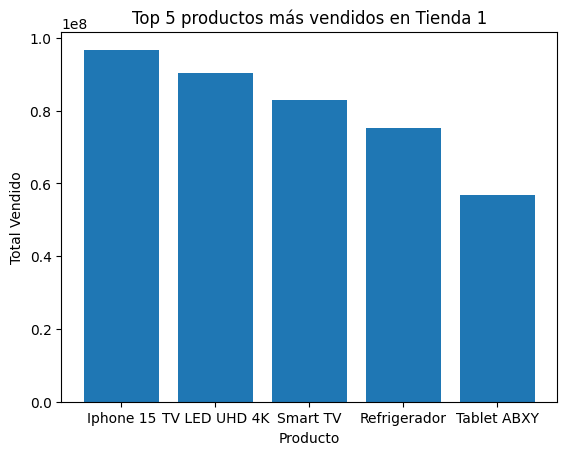


 Top 5 productos más vendidos en Tienda 2:
           Producto       Precio
0         Iphone 15  113225800.0
1     TV LED UHD 4K  103375000.0
2      Refrigerador   97632500.0
3  Lavadora de ropa   66762300.0
4          Smart TV   61142000.0


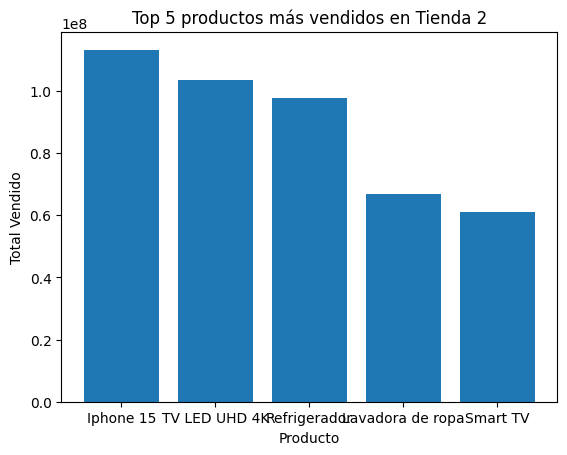


 Top 5 productos más vendidos en Tienda 3:
        Producto      Precio
0   Refrigerador  99889700.0
1  TV LED UHD 4K  96669100.0
2      Iphone 15  93225700.0
3       Smart TV  78837300.0
4   Lavavajillas  64364800.0


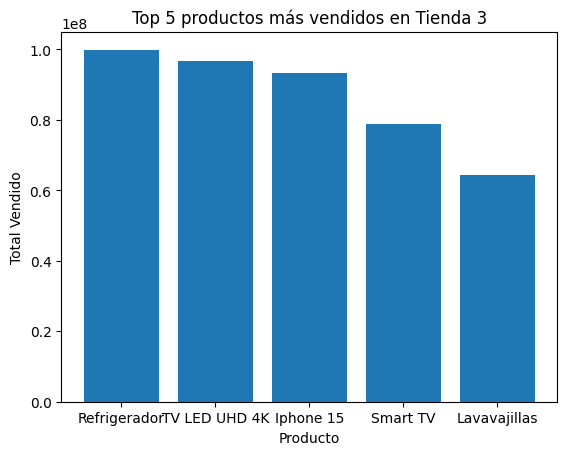


 Top 5 productos más vendidos en Tienda 4:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


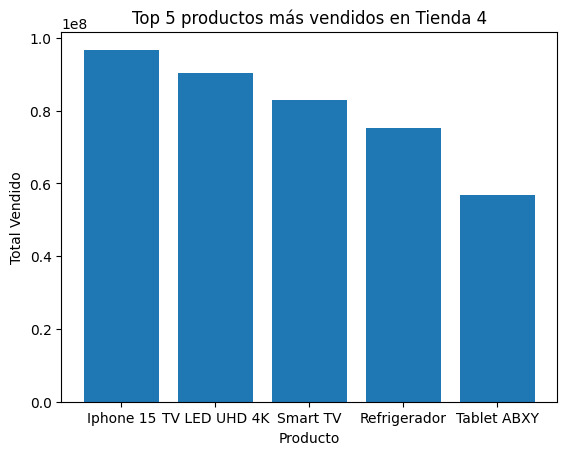

In [ ]:
import matplotlib.pyplot as plt

urls_tiendas = {
    'Tienda 1': url,
    'Tienda 2': url2,
    'Tienda 3': url3,
    'Tienda 4': url4
}

# Iterar sobre cada tienda y generar top 5 productos más vendidos
for nombre_tienda, url in urls_tiendas.items():
    # Leer los datos
    df = pd.read_csv(url)

    # Agrupar por producto y sumar el total vendido (por precio)
    top_5 = (
        df.groupby('Producto')['Precio']
        .sum()
        .nlargest(5)
        .reset_index()
    )

    # Mostrar tabla
    print(f"\n Top 5 productos más vendidos en {nombre_tienda}:")
    print(top_5)

 # Grafico

    plt.bar(top_5['Producto'], top_5['Precio'])
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido')
    plt.title(f'Top 5 productos más vendidos en {nombre_tienda}')
    plt.show()

# 5. Envío promedio por tienda

     Tienda  Costo Envío Promedio
1  Tienda 2              25216.24
2  Tienda 3              24805.68
0  Tienda 1              23459.46
3  Tienda 4              23459.46


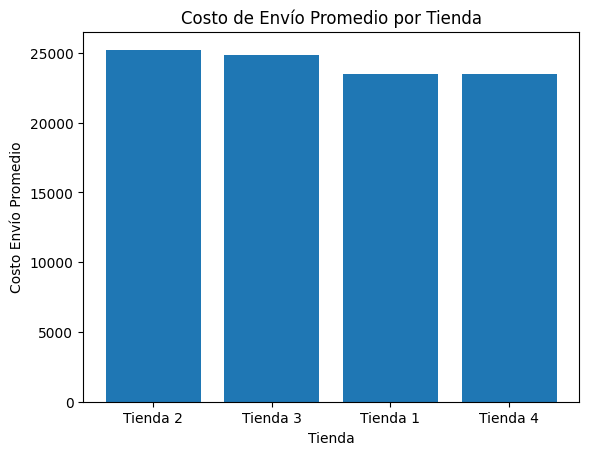

In [ ]:
import matplotlib.pyplot as plt

# Lista para almacenar los resultados
costos_envio = []

# Iterar sobre cada tienda y calcular promedio del costo de envío
for nombre_tienda, url in urls_tiendas.items():
    df = pd.read_csv(url)

    # Aseguramos que no hayan valores nulos
    promedio_envio = df['Costo de envío'].dropna().mean()

    costos_envio.append({
        'Tienda': nombre_tienda,
        'Costo Envío Promedio': round(promedio_envio, 2)
    })

# Crear DataFrame con los resultados
df_envio = pd.DataFrame(costos_envio).sort_values(by='Costo Envío Promedio', ascending=False)

# Mostrar resultados
print(df_envio)

#gráfico
plt.bar(df_envio['Tienda'], df_envio['Costo Envío Promedio'])
plt.xlabel('Tienda')
plt.ylabel('Costo Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')
plt.show()


**Informe Final**

*El informe final de Analisis de tienda para decisión de venta.*

**Introducción:** El objetivo de este análisis es ayudar al Sr. Juan a determinar cual de las cuatro tiendas es la mejor oportunidad de ventas. Para esto se proceso la información, llegando a los siguientes resultados:

*Los ingresos totales de las tiendas:*
 Los datos son respecto a los valores de ventas. Según el gráfico de barra se puede evidenciar, que la tienda 1 tuvo el mayor ingreso total, seguido por la tienda 2.

*Las categorías de productos más y menos vendidas:*
Los productos más vendidos son de electrónica y electródomesticos, se realizaron las mejores ventas en la tiendas 2 seguida de la tienda 3. En el caso de la tienda 1 tuvo mejores ventas que la tienda 4, quedando ésta en el último lugar.
Los productos menos vendidos fueron los articulos para el hogar y los libros. En el caso de los art. para el hogar, tuvo mejores ventas las tiendas 1 y 4 y en el caso de los libros se destaco la tienda 2, seguida de la tienda 3.

*Las calificaciones promedio de los clientes por tienda:*
Según el análisis, podemos confirmar que la mayor satisfacción de los clientes fueron en la tienda 3, y la tienda 2.
La calificaciones mas baja las tiene las tienda 1.

*Los productos más y menos vendidos.*
Los productos más vendidos en la tienda 1 y la tienda 4 son los Iphone 15 y TV led UHD 4K. En el caso de estas tiendas los productos menos vendidos está el refrigerador  y en último lugar la Tablet.

*El coste de envío promedio para cada tienda.*
La tienda 2 tuvo el costo de envio mas alto.
Las tiendas 1 y 4 mantuvieron el nivel más bajo del promedio.

**Conclusión Final:**

Se recomienda al Sr. Juan vender la Tienda la Tienda 4, esta decisión fue fundamentada bajolos sigientes aspectos claves:
- Los ingresos totales son bajos
- Posee ventas equilibradas, aunque la misma baja su productividad en las ventas de los productos de tecnología.
- Posee un margen de ganancia mayor, ya que posee un costo de envio bajo.
- La satisfacción de los clientes es baja.

En el caso de la Tienda 1, apesar de que sus ingresos totales son altos, se recomienda evaluar la atiención al cliente y el servicio post venta.
La Tienda 3: la satisfacción de los cliente es alta, pero inestable en las ventas.
La tienda 2: posee un alto costo de envio, pero tiene buena respuestas de los clientes en satisfacción y ventas.

*Recomendación estrategica vender la Tienda 4*


